# 결정트리

## Cancer

In [1]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

y = cancer['target']
X = cancer['data']

cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [2]:
from sklearn.model_selection import train_test_split
x_tr, x_te, y_tr, y_te = train_test_split(
    X, y, random_state = 0, stratify = y
)

In [3]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier().fit(x_tr, y_tr)
model.score(x_tr, y_tr), model.score(x_te, y_te)

(1.0, 0.8951048951048951)

In [4]:
model.feature_importances_

array([0.        , 0.0393304 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00501731, 0.        ,
       0.00243087, 0.00668975, 0.        , 0.00999282, 0.00401385,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03687207, 0.03938527, 0.72534081, 0.        , 0.00931787,
       0.        , 0.        , 0.10516335, 0.        , 0.01644564])

<AxesSubplot:>

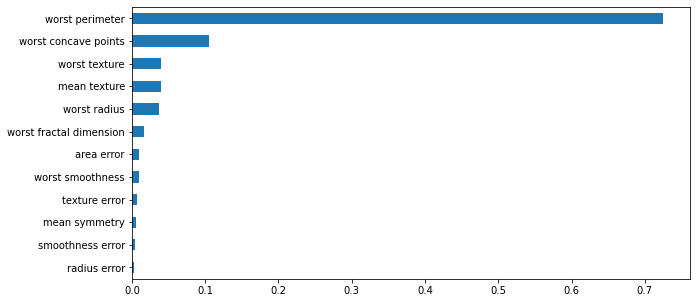

In [5]:
import pandas as pd
fi = pd.Series(model.feature_importances_, index=cancer['feature_names'])
fi[fi!=0].sort_values(ascending=True).plot(kind='barh',figsize=(10,5))

In [6]:
fi[fi!=0].sort_values(ascending=True)

radius error               0.002431
smoothness error           0.004014
mean symmetry              0.005017
texture error              0.006690
worst smoothness           0.009318
area error                 0.009993
worst fractal dimension    0.016446
worst radius               0.036872
mean texture               0.039330
worst texture              0.039385
worst concave points       0.105163
worst perimeter            0.725341
dtype: float64

## 결정트리 그래프 그리기 위한 설정
- cmd 추가로 실행. cmd내에서 "conda install python-graphviz" 실행
- 주피터노트북에서 Kernel -> restart 실행
- 그래프 그리는 코드 다시 실행

In [7]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

y = cancer["target"]
X = cancer["data"]
cancer["target_names"]

from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(
    X, y, random_state=0, stratify=y
)

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier().fit(x_tr,y_tr)
print(model.score(x_tr,y_tr), model.score(x_te,y_te) )

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3).fit(x_tr,y_tr)
print(model.score(x_tr,y_tr), model.score(x_te,y_te) )

1.0 0.9230769230769231
0.9765258215962441 0.9300699300699301


In [9]:
from sklearn.tree import export_graphviz
export_graphviz(model,  out_file='model.dot',
                feature_names=cancer['feature_names'],
                class_names=cancer['target_names'], impurity=True, filled=True)

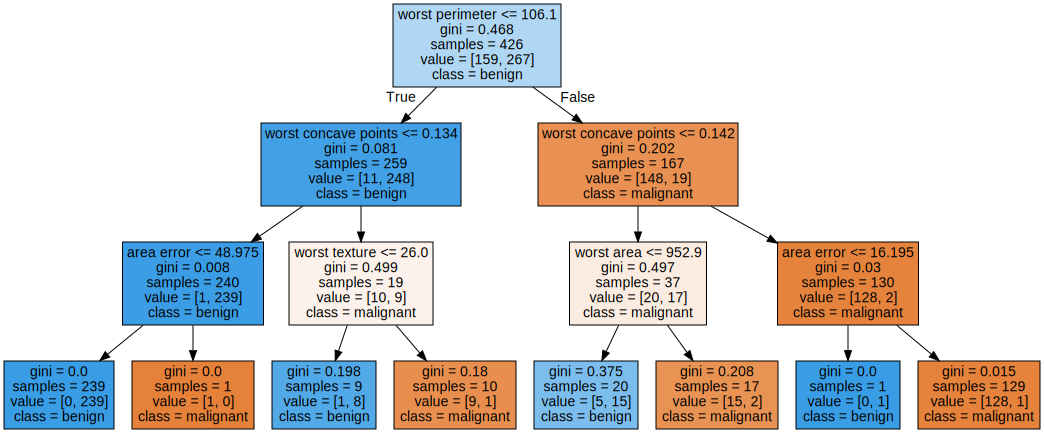

In [10]:
import graphviz
with open('model.dot') as f:
    data = f.read()
graphviz.Source(data)

[Text(0.5, 0.875, 'X[22] <= 106.1\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(0.25, 0.625, 'X[27] <= 0.134\ngini = 0.081\nsamples = 259\nvalue = [11, 248]'),
 Text(0.125, 0.375, 'X[13] <= 48.975\ngini = 0.008\nsamples = 240\nvalue = [1, 239]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 239\nvalue = [0, 239]'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.375, 0.375, 'X[21] <= 26.0\ngini = 0.499\nsamples = 19\nvalue = [10, 9]'),
 Text(0.3125, 0.125, 'gini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(0.4375, 0.125, 'gini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.75, 0.625, 'X[27] <= 0.142\ngini = 0.202\nsamples = 167\nvalue = [148, 19]'),
 Text(0.625, 0.375, 'X[23] <= 952.9\ngini = 0.497\nsamples = 37\nvalue = [20, 17]'),
 Text(0.5625, 0.125, 'gini = 0.375\nsamples = 20\nvalue = [5, 15]'),
 Text(0.6875, 0.125, 'gini = 0.208\nsamples = 17\nvalue = [15, 2]'),
 Text(0.875, 0.375, 'X[13] <= 16.195\ngini = 0.03\nsamples = 130\nvalue = [128, 2

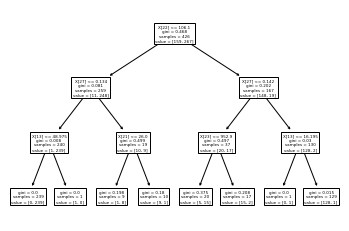

In [11]:
from sklearn import tree
tree.plot_tree(model)

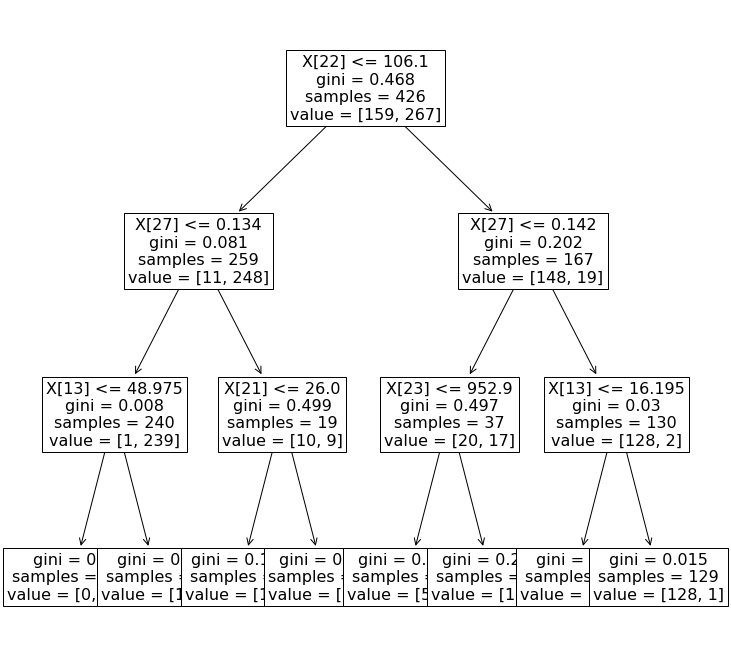

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))

from sklearn import tree
tree.plot_tree(model, fontsize=16)

plt.show()

## 보스턴 집값

In [13]:
from sklearn.datasets import load_boston

boston = load_boston()

y = boston['target']
X = boston['data']

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [14]:
from sklearn.model_selection import train_test_split
x_tr, x_te, y_tr, y_te = train_test_split(
    X, y, random_state = 0
)

In [15]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor().fit(x_tr, y_tr)
model.score(x_tr, y_tr), model.score(x_te, y_te)

(1.0, 0.6691726629553263)

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(200,100))

from sklearn import tree
tree.plot_tree(model, fontsize=16)

plt.show()

<AxesSubplot:>

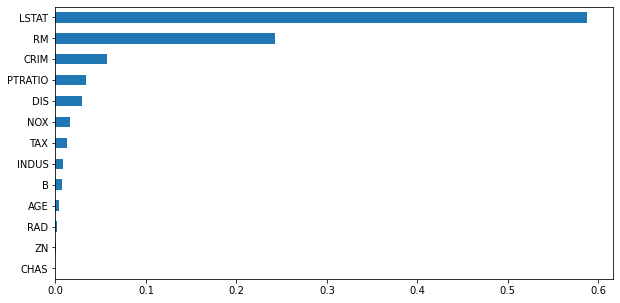

In [20]:
import pandas as pd
fi = pd.Series(model.feature_importances_, index=boston['feature_names'])
fi[fi!=0].sort_values(ascending=True).plot(kind='barh',figsize=(10,5))